# 🧠 Predicting Fuel Consumption for Carsharing Optimization

## 🚗 Business Context

In this case study, you are a data analyst at a successful **carsharing company**. As part of your mission to increase operational efficiency, you're tackling one key question:  
**Which vehicle models offer the best fuel performance per 100 kilometers?**

While customer acquisition is crucial, optimizing operational costs like **fuel consumption** can significantly improve **profit margins**. Your goal is to build a machine learning model that estimates fuel usage based on various vehicle specifications — helping your team make smarter purchasing decisions.

---

## 🔍 Problem Definition

- **Business Goal**: Reduce operational costs by selecting the most fuel-efficient car models.
- **ML Task Type**: Supervised Learning – **Regression**
- **Target Variable**: Fuel consumption per 100 kilometers.
- **Features**: Vehicle specifications such as engine type, weight, size, horsepower, etc.
- **Value to the Business**: Helps procurement and operations teams optimize fleet composition and lower long-term costs.

---

## 📊 Key Questions

- What factors most influence a car's fuel consumption?
- Can we predict fuel usage accurately using existing vehicle parameters?
- Which models should the company invest in based on predicted performance?

---

## 🧪 ML Approach Summary

| Step                        | Description                                        |
|-----------------------------|----------------------------------------------------|
| 📦 Data                     | Fuel consumption logs, vehicle specs, monthly stats |
| ⚙️ Task Type                | Regression                                         |
| 📏 Metrics                  | R², RMSE, MAPE                                     |
| 🧠 Algorithms               | Linear Regression, Random Forest, Gradient Boosting|
| ⏱️ Time Series Structure?  | Not required                                       |
| 🧮 Output                   | Fuel usage (liters/100km) for each vehicle         |

---

## ✅ Why This Matters

This project simulates the **real-world decision-making process** of a machine learning analyst. From translating business needs into a predictive task, selecting appropriate algorithms, validating models, and finally **delivering insights** that can drive **cost-saving strategies**.
___

## 🔎 Exploratory Data Analysis (EDA)

Before training any machine learning model, it’s crucial to understand the dataset you're working with. In this stage, our primary goal is to **evaluate data quality**, **understand feature distributions**, **identify correlations**, and **spot potential anomalies**.

This initial exploration lays the groundwork for feature engineering, data cleaning, and model selection. It also allows us to formulate hypotheses about the relationships between vehicle attributes and fuel consumption.

---

### 🧭 Key Objectives

1. **Assess data quality**  
   - How large is the dataset?  
   - Are there missing values?  
   - Which features require preprocessing?

2. **Identify feature types**  
   - Are the features numerical or categorical?  
   - Will categorical variables need encoding?

3. **Examine distributions and relationships**  
   - Are there outliers?  
   - Which features correlate strongly with the target (fuel consumption)?

4. **Understand the business context behind features**  
   - Even if anonymized, can the feature semantics be inferred?  
   - What are the most likely contributors to fuel efficiency?

5. **Check for time-related patterns**  
   - Does the target variable vary over time?  
   - Will we need to apply time-series-aware validation methods?

---

By answering these questions and exploring visualizations (e.g., histograms, scatter matrices, heatmaps), we can better prepare the data for the modeling stage and avoid costly mistakes later in the pipeline.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# lee los datos de los automóviles y su consumo de combustible desde el archivo CSV
cars = pd.read_csv('datasets/auto_cons_us.csv')

# muestra su tamaño y las primeras 5 filas
print(cars.shape)
cars.head()

# consigue la información resumida del dataset
cars.info()

(398, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fuel consumption     398 non-null    int64  
 1   # of cylinders       398 non-null    int64  
 2   Engine displacement  398 non-null    int64  
 3   Engine power         392 non-null    float64
 4   Weight               398 non-null    int64  
 5   Acceleration         398 non-null    float64
 6   Year                 398 non-null    int64  
 7   Origin               398 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 25.0+ KB


Most of the features are numerical; only the "Origin" column is categorical.  
The situation with missing values is acceptable — there are only six of them, all in the "Engine power" feature.
___

## 🧠 EDA: Hypothesis Generation

Once you've gained a basic understanding of the features, it's time to dive deeper and explore them further.

### 🔍 Explore Numeric Feature Distributions

- Plot histograms for all numeric features to detect outliers and understand their distributions. Ideally, features should follow a roughly normal distribution.
- If your dataset has a time component, visualize how features evolve over time. This is crucial for industrial or time-dependent processes, as it reveals whether feature behavior changes, potentially invalidating your model over time.

### 🚨 Identify Outliers and Correlation

- Use histograms and scatter plots to identify extreme values.
- Compute the **correlation matrix** using `.corr()` and visualize it using a **heatmap**:
  
  ```python
  cm = df.corr()
  sns.heatmap(cm, annot=True, square=True)

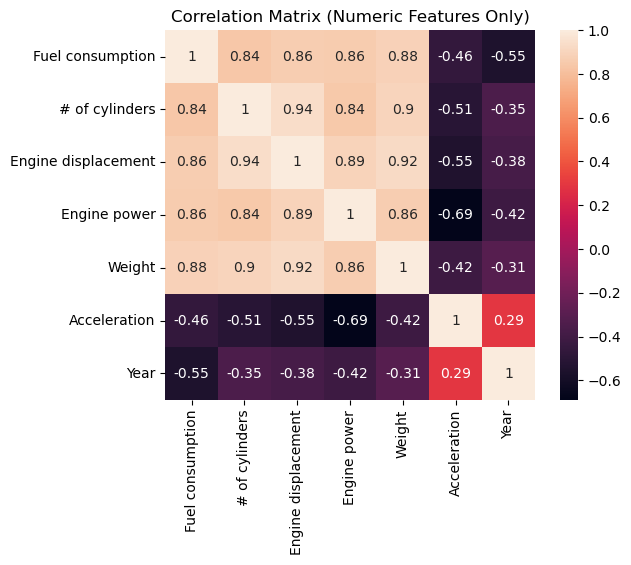

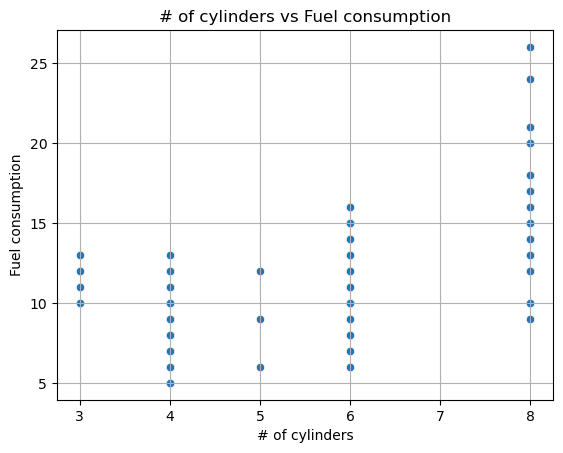

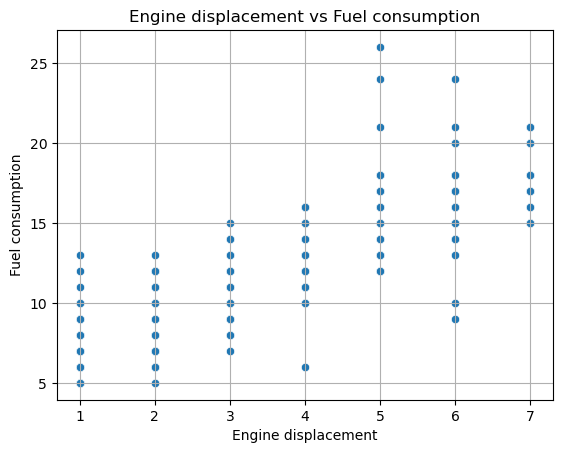

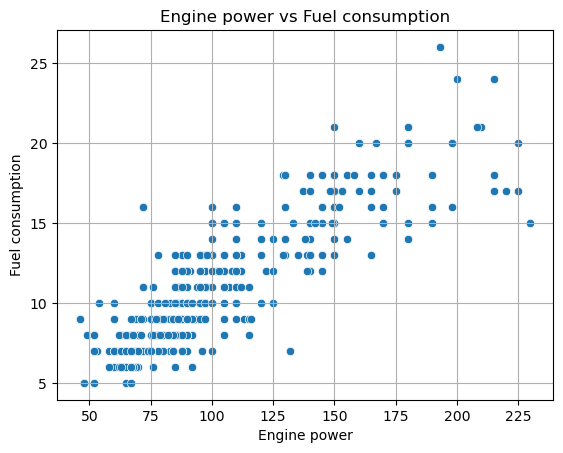

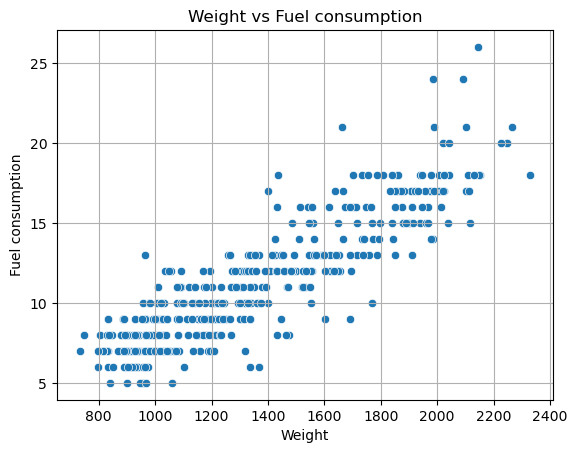

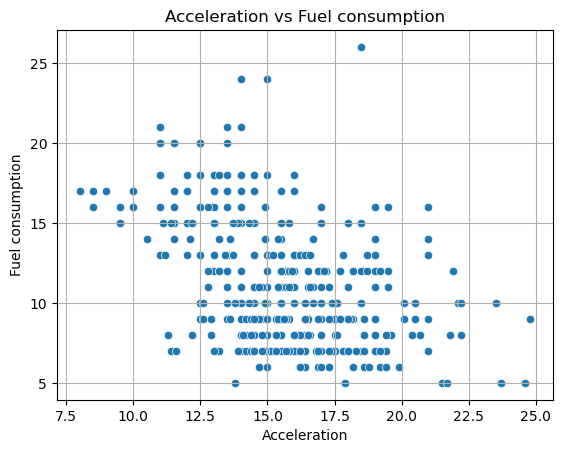

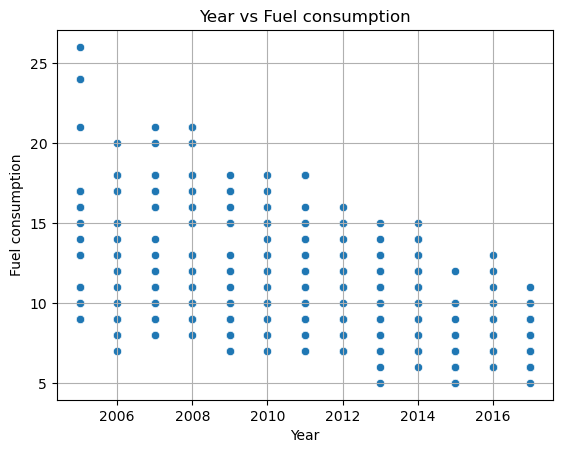

In [14]:
# Compute correlation matrix using only numeric columns
numeric_cols = cars.select_dtypes(include='number')  # Filter numeric columns only
cm = numeric_cols.corr()

# Plot heatmap of correlation matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, square=True)
ax.set_ylim(len(cm), 0)  # Fix heatmap cutoff issue
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

# Plot scatterplots of each feature vs. the target
for col in numeric_cols.drop(columns='Fuel consumption').columns:
    sns.scatterplot(x=cars[col], y=cars['Fuel consumption'])
    plt.title(f'{col} vs Fuel consumption')
    plt.xlabel(col)
    plt.ylabel('Fuel consumption')
    plt.grid(True)
    plt.show()

## 📌 Conclusion

We did not observe any clear bias or extreme outliers in the distribution plots — that’s great! This means we can proceed confidently to build a predictive model with this data.

Looking at the correlation matrix and scatter plots, we already see that about half of the features are strongly correlated with the target variable. It appears likely that the number of cylinders, high engine power, engine displacement, and vehicle weight contribute to increased fuel consumption.

This isn't a groundbreaking insight — but it's reassuring that the results are logical and aligned with domain knowledge. With just exploratory data analysis (EDA), even before building a model, we’ve identified the key factors influencing **Fuel Consumption**.

**💡 Moral of the story: Never skip EDA! It often tells you more than you think.**

## 🧹 Data Preprocessing: Key Steps Before Modeling

Once you understand the structure and challenges of your dataset (e.g., missing values, outliers, categorical features), you're ready to preprocess it before feeding it into your machine learning model.

The most common steps are:

---

### 1. 🧱 Handling Missing Values

Several strategies exist:

- **Drop rows with missing values**  
  Useful when you have a large dataset and very few missing values.

- **Forward fill (ffill)**  
  For time series data, fill missing values with the last known value.

- **Replace with mean/median**  
  Common when there is no time-related structure and missingness is random.

- **Replace with zeros or "unspecified" labels**  
  For tree-based models, missing values can be informative. In categorical variables, replacing with `"unspecified"` can preserve useful signals.

⚠️ Always make sure imputed values won’t introduce bias or noise into your model!

---

### 2. 🚨 Handling Outliers

Outliers can distort linear models significantly. Standard steps include:

- Define thresholds (e.g., below 5th or above 95th percentiles)
- Replace outliers with max/min/median values
- Drop outliers from the dataset if sample size allows

---

### 3. 🏷️ Encoding Categorical Features

There are two main encoding methods:

- **Label Encoding**  
  Converts string labels into numeric values, but introduces ordinal relationships (e.g., Moscow = 0, Berlin = 1).

```python
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['City'] = encoder.fit_transform(df['City'])

In [15]:
# Display the original shape and first 5 rows
print("Original dataset shape:", cars.shape)
print(cars.head())

# Drop rows with missing values and show the updated shape
cars.dropna(inplace=True)
print("Updated dataset shape after dropping missing values:", cars.shape)

Original dataset shape: (398, 8)
   Fuel consumption  # of cylinders  Engine displacement  Engine power  \
0                13               8                    5         130.0   
1                16               8                    6         165.0   
2                13               8                    5         150.0   
3                15               8                    5         150.0   
4                14               8                    5         140.0   

   Weight  Acceleration  Year Origin  
0    1589          12.0  2005     US  
1    1675          11.5  2005     US  
2    1559          11.0  2005     US  
3    1557          12.0  2005     US  
4    1564          10.5  2005     US  
Updated dataset shape after dropping missing values: (392, 8)


## 🧹 Data Preprocessing: Handling Missing Values

Before training any machine learning model, it's essential to clean the data. During the exploratory data analysis (EDA), we discovered that the "Engine power" feature had six missing values. While this might raise concerns, these account for only about **1.5% of the dataset**, which is a small enough proportion to consider dropping without significant loss of information.

Instead of filling or imputing these missing values (which can introduce bias or require additional logic), we opted for a simpler solution: removing the rows entirely. This approach is both efficient and effective for small-scale missing data.

---

## ✅ Conclusion

We sacrificed **1.5% of the dataset**, but saved time and avoided introducing potential noise through imputation. This quick win streamlines the preprocessing phase and keeps the dataset clean and ready for modeling. In scenarios where data loss is minimal and random, dropping rows can be a practical and scalable solution.

In [16]:
# Convert categorical features (like 'Origin') to numeric using one-hot encoding
cars = pd.get_dummies(cars)

# Show updated shape and the first 5 rows
print("Shape after encoding categorical variables:", cars.shape)
print(cars.head())

Shape after encoding categorical variables: (392, 10)
   Fuel consumption  # of cylinders  Engine displacement  Engine power  \
0                13               8                    5         130.0   
1                16               8                    6         165.0   
2                13               8                    5         150.0   
3                15               8                    5         150.0   
4                14               8                    5         140.0   

   Weight  Acceleration  Year  Origin_Asia  Origin_Europe  Origin_US  
0    1589          12.0  2005        False          False       True  
1    1675          11.5  2005        False          False       True  
2    1559          11.0  2005        False          False       True  
3    1557          12.0  2005        False          False       True  
4    1564          10.5  2005        False          False       True  


## 🔄 Handling Categorical Features

Since there is only one categorical feature, `"Origin"`, which contains three distinct values, we applied one-hot encoding using `get_dummies()`. This approach is simple and effective for features with a low number of unique categories.

Instead of introducing arbitrary numerical relationships (as would be the case with label encoding), one-hot encoding creates three new binary columns representing each possible value of `"Origin"`, avoiding any unintended ordinal implications.

```python
cars = pd.get_dummies(cars)

In [17]:
# Apply one-hot encoding to categorical variable 'Origin'
cars = pd.get_dummies(cars)

# Split data into features (X) and target (y)
X = cars.drop('Fuel consumption', axis=1)
y = cars['Fuel consumption']

# Split the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the training feature matrix
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# Output the first 5 rows of the standardized training data
print(X_train_st[:5])

# Standardize the test feature matrix
X_test_st = scaler.transform(X_test)

[[-0.8576193  -1.23609922 -0.8984236  -1.22390661  0.44574133  0.25439532
   1.95330095 -0.45149325 -1.28551249]
 [ 0.32752348  0.47332223 -0.1059203   0.54551669  0.58957333  0.52802327
  -0.51195388 -0.45149325  0.77789987]
 [-0.8576193  -0.66629207 -0.8984236  -0.91937679 -0.84874664  0.80165122
  -0.51195388 -0.45149325  0.77789987]
 [ 0.32752348 -0.09648492 -0.60783906  0.04671783  0.73340532 -0.01923264
  -0.51195388 -0.45149325  0.77789987]
 [-0.8576193  -0.66629207 -0.23800419 -0.82749279 -0.02171266 -1.11374445
   1.95330095 -0.45149325 -1.28551249]]


> ⚠️ The data might look a bit strange — for example, the "Year" values became negative for some observations (as if cars existed two hundred years ago) — but this is actually better for the model. Standardization centers and scales the values, which helps improve model performance, especially for linear algorithms.

## ⏱️ Data Splitting: Random vs Temporal

When building a machine learning model, choosing how to split your data is crucial to obtaining realistic and trustworthy evaluation metrics. There are two main strategies:

- **Random Splitting**: Useful when observations are independent of each other and not part of a time series. It's ideal for tasks like predicting movie box office based on genre, cast, or budget — where one observation doesn't affect another.
- **Temporal Splitting**: Required when predicting values over time. If future values depend on past behavior — such as monthly churn, sensor readings, or revenue forecasting — your validation set must come from the "future" relative to the training set. Otherwise, the model might unintentionally learn from future data, inflating its performance.

Using the right strategy ensures that your validation process simulates a real-world scenario. It helps avoid **data leakage**, where the model indirectly "sees the answer" before it's supposed to.

---

## ✅ Summary of Questions and Answers

| Scenario | Proper Split | Reason |
|---------|--------------|--------|
| Predicting monthly churn for 2 years | Temporal | Series forecasting over time |
| Predicting if a customer will churn next month, with monthly features | Random | Observations can be treated as independent |
| Identifying substances in pills with minute-by-minute readings | Temporal | Sensor data over time — must preserve sequence |
| Estimating car fuel consumption based on static features | Random | No time dependency |
| Predicting accidents in a dairy plant using lagged sensor data | Temporal | Features are explicitly based on time lags |

---

⚠️ **Remember**: Whenever your features include time lags or rolling statistics, you are working with **time series data** and must apply a **temporal split**.

📌 Always align your data validation strategy with how your model will be used in production!

## 🧠 Selecting the Right Machine Learning Model

Choosing the appropriate algorithm is essential to solving a machine learning problem effectively. Below is a quick guide based on the type of problem you're tackling:

---

### 🔍 Supervised Learning

#### 🔢 Binary Classification
Use these algorithms when you're predicting a binary outcome (yes/no, 0/1):
- `LogisticRegression()` — Fast, interpretable baseline
- `DecisionTreeClassifier()` — Easy to interpret, prone to overfitting
- `RandomForestClassifier()` — Ensemble method, handles complexity well
- `GradientBoostingClassifier()` — High performance, useful with tuning
- `xgboost.XGBClassifier` — Powerful gradient boosting implementation (advanced)

#### 📈 Regression
Use these when your target variable is continuous (e.g., predicting fuel consumption):
- `LinearRegression()` — Simple baseline model
- `Lasso()` — Adds L1 regularization (helps with feature selection)
- `Ridge()` — Adds L2 regularization (controls multicollinearity)
- `DecisionTreeRegressor()` — Non-linear, intuitive
- `RandomForestRegressor()` — Handles complexity, robust
- `GradientBoostingRegressor()` — Powerful, often state-of-the-art
- `xgboost.XGBRegressor` — High-performance gradient boosting (advanced)

---

### 🔗 Unsupervised Learning

#### 🔁 Clustering
Used to find patterns or groupings in unlabeled data:
- `KMeans()` — Popular, fast, requires predefined number of clusters
- `AgglomerativeClustering()` — Hierarchical, good for small datasets
- `DBSCAN()` — Identifies clusters with arbitrary shape (not covered in this course)

---

## ✅ Example Model Choices by Scenario

| Scenario | Recommended Algorithm |
|----------|------------------------|
| Predicting fuel consumption | `LinearRegression()`, `RandomForestRegressor()`, `GradientBoostingRegressor()` |
| Forecasting cosmetic store sales | `Ridge()` (to address multicollinearity) |
| Segmenting comic book customers | `KMeans()` |
| Predicting semester completion for students | `GradientBoostingClassifier()`, `RandomForestClassifier()` |

---

🧪 **Pro Tip**: Always compare several models using appropriate metrics and cross-validation. Let the data guide your final choice!

📌 **Remember**: The best algorithm depends not only on the data type and task, but also on interpretability, performance, and computational cost.

## 🧠 Train Models and Select the Best One

Now that you've completed all the preliminary stages — from defining the business problem to preprocessing the data — it's time for the most important part:

- Train multiple machine learning models
- Make predictions on the validation set
- Evaluate their performance using relevant metrics
- Select the best model based on your results

This is the stage where everything comes together — data, logic, and strategy — to generate real business value. 🚀

In [24]:

# Standardize the features
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Define regression models
models = [
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0)
]

# Define custom MAPE function
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    return perc_error_abs.sum() / len(y_true)

# Function to fit model and print evaluation metrics
def make_prediction(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{model.__class__.__name__}')
    print('MAE:  {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE:  {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('MAPE: {:.2f}'.format(mape(y_test, y_pred)))
    print('R2:   {:.2f}'.format(r2_score(y_test, y_pred)))

# Run all models
for model in models:
    make_prediction(model, X_train_st, y_train, X_test_st, y_test)


Lasso
MAE:  1.48
MSE:  4.12
MAPE: 0.16
R2:   0.72

Ridge
MAE:  1.07
MSE:  2.19
MAPE: 0.10
R2:   0.85

DecisionTreeRegressor
MAE:  1.27
MSE:  3.65
MAPE: 0.12
R2:   0.76

RandomForestRegressor
MAE:  0.98
MSE:  1.92
MAPE: 0.10
R2:   0.87

GradientBoostingRegressor
MAE:  0.96
MSE:  2.00
MAPE: 0.09
R2:   0.87


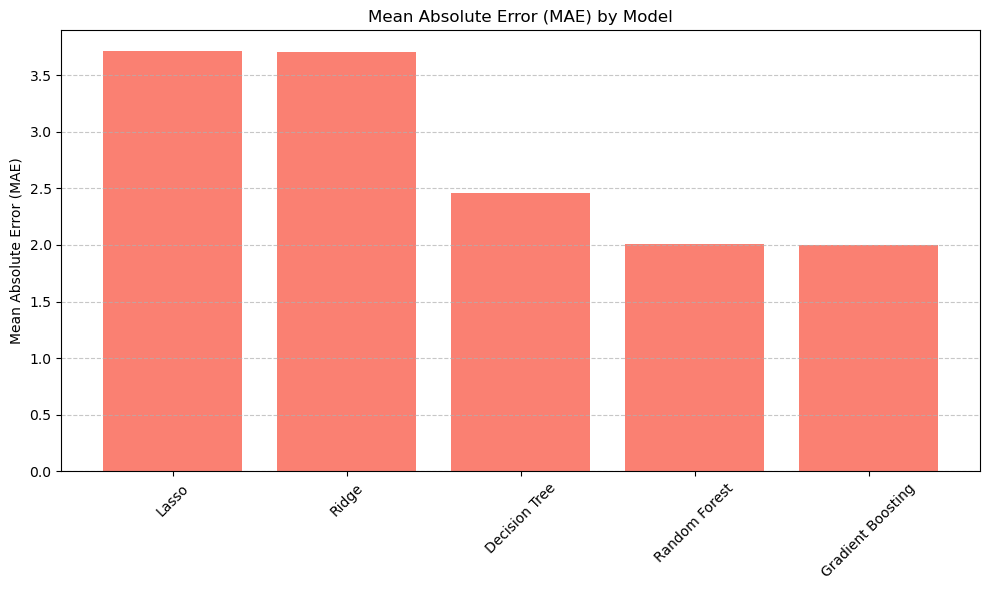

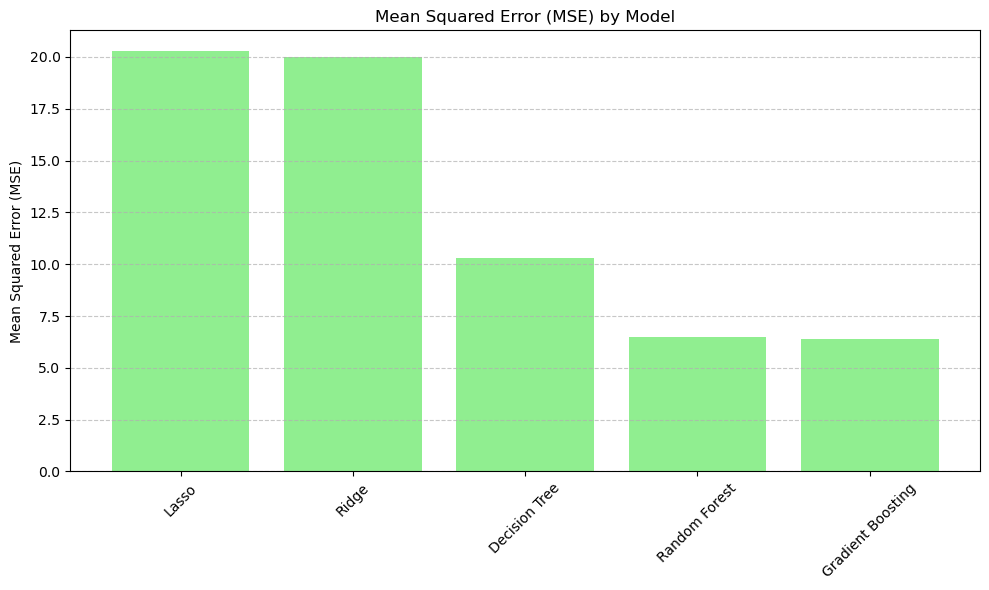

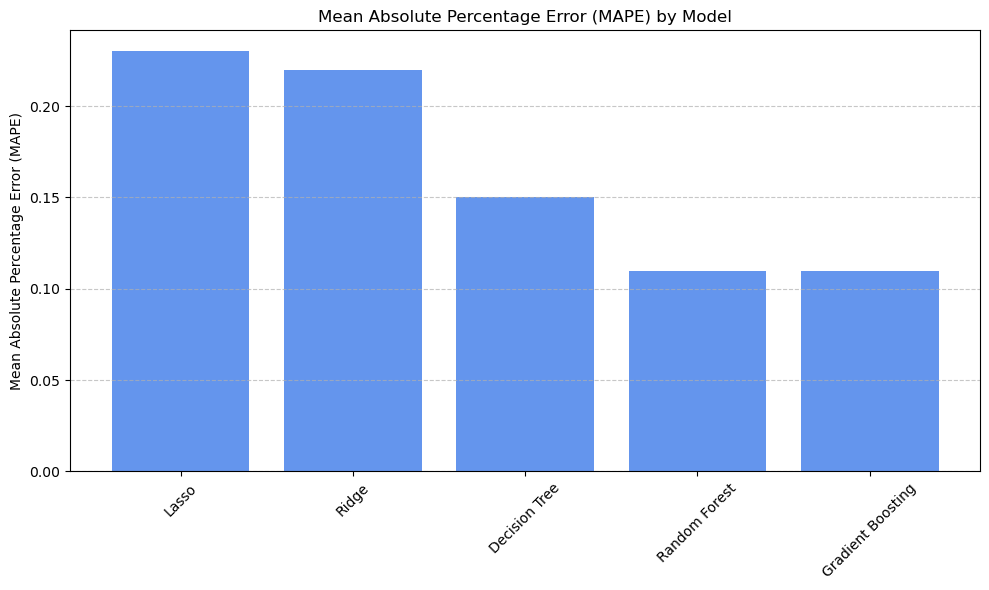

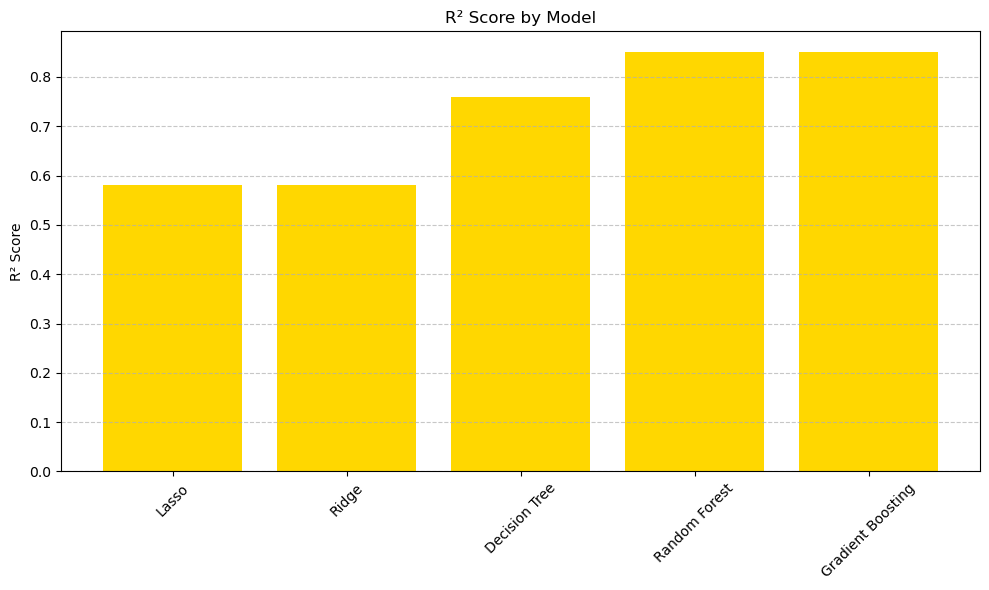

In [19]:
# Lista de nombres de modelos en el mismo orden que en tu lista original
model_names = ['Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Listas con los valores de las métricas por modelo (usa los valores que te imprimió `make_prediction`)
mae_scores = [3.71, 3.70, 2.46, 2.01, 2.00]
mse_scores = [20.27, 19.99, 10.31, 6.48, 6.41]
mape_scores = [0.23, 0.22, 0.15, 0.11, 0.11]
r2_scores = [0.58, 0.58, 0.76, 0.85, 0.85]

# Función para graficar barras
def plot_metric(metric_values, metric_name, color='skyblue'):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, metric_values, color=color)
    plt.title(f'{metric_name} by Model')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Graficar cada métrica
plot_metric(mae_scores, 'Mean Absolute Error (MAE)', color='salmon')
plot_metric(mse_scores, 'Mean Squared Error (MSE)', color='lightgreen')
plot_metric(mape_scores, 'Mean Absolute Percentage Error (MAPE)', color='cornflowerblue')
plot_metric(r2_scores, 'R² Score', color='gold')

In [25]:
# Convert categorical variables into dummy/indicator variables
cars = pd.get_dummies(cars)

# Split the data into features (X) and the target variable (y)
X = cars.drop(columns=['Fuel consumption'])
y = cars['Fuel consumption']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a StandardScaler object and apply it to the training set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # Fit and transform the training set

# Apply the scaler to the test set
X_test_st = scaler.transform(X_test)

# Define the list of regression models to evaluate
models = [Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    return (perc_error_abs.sum() / len(y_true))

# Function that trains the model and prints performance metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
        mean_absolute_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred),
        mape(y_test, y_pred),
        r2_score(y_test, y_pred)
    ))

# Loop through the models and print their metrics
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test)

Lasso()
MAE:1.53 MSE:4.90 MAPE:0.14 R2:0.72 
Ridge()
MAE:1.02 MSE:2.22 MAPE:0.09 R2:0.87 
DecisionTreeRegressor()
MAE:1.18 MSE:3.28 MAPE:0.11 R2:0.82 
RandomForestRegressor()
MAE:0.89 MSE:1.75 MAPE:0.08 R2:0.90 
GradientBoostingRegressor()
MAE:0.89 MSE:1.90 MAPE:0.08 R2:0.89 


## 🧠 Conclusions

Ensemble models produced the best results overall, although both linear models and decision trees also performed reasonably well.  
In problems like this, **gradient boosting** is typically more accurate than a **random forest**, offering improved predictive power with optimized learning from prior errors.

When choosing a model:
- Use **linear regression** models (like Lasso or Ridge) when interpretability is key and data has minimal noise.
- Use **tree-based models** for their flexibility and ability to capture nonlinear relationships.
- For maximum accuracy in complex datasets, **ensemble methods** like Gradient Boosting Regressor are often the best choice.

___

## 🔍 Feature Importance: Understanding the "Why" Behind Predictions

You've trained your model and it makes accurate predictions — great! But to **trust** those predictions and to communicate them effectively to stakeholders, you must go beyond the “what” and dive into the “why.”

### 🧠 Why Is Feature Importance Crucial?

Machine learning models, especially complex ones like ensembles, often behave like black boxes. To make sense of them, we use **feature importance analysis** to understand:

- What features contributed most to the predictions?
- How can we interpret the model's behavior?
- Are the model's decisions aligned with domain knowledge?

Understanding feature importance helps:
- Build trust in your model,
- Optimize future feature engineering,
- Provide actionable insights to the business team.

---

### 🔧 Feature Importance by Model Type

#### ✅ Linear Models (Lasso, Ridge, Linear Regression)

- **Interpretation:** Look at the absolute values of the model’s coefficients (`.coef_`).
- **Example:** A large positive coefficient means a strong positive influence on the target variable; a large negative one implies the opposite.
- **Intercept (`.intercept_`)** represents the model’s prediction when all feature values are 0.

```python
coefficients = model.coef_
intercept = model.intercept_

In [27]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset containing vehicle specs and fuel consumption, print its shape and first 5 rows
cars = pd.read_csv('datasets/auto_cons_us.csv')

# Remove rows with missing values from the dataset
cars.dropna(inplace=True)

# Encode categorical variables
cars = pd.get_dummies(cars)

# Split into features (X) and target variable (y)
X = cars.drop(columns=['Fuel consumption'])
y = cars['Fuel consumption']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a StandardScaler object and apply it to the training set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # Fit and transform training set

# Apply standardization to the test feature matrix
X_test_st = scaler.transform(X_test)

# Define the list of models
models = [Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

# Function to calculate MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    return (perc_error_abs.sum() / len(y_true))

# Function that takes a model and data and prints evaluation metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred), 
                                                                mean_squared_error(y_test, y_pred),
                                                                mape(y_test, y_pred),
                                                                r2_score(y_test, y_pred)))

# Loop over models to print their evaluation metrics
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test)

# Train the final model (best performing one)
final_model = GradientBoostingRegressor()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Create a DataFrame with feature names and their importance
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': final_model.feature_importances_})
fi_df = fi_df.sort_values('importance', ascending=False)
print(fi_df)

Lasso()
MAE:1.57 MSE:4.87 MAPE:0.14 R2:0.72 
Ridge()
MAE:1.32 MSE:3.15 MAPE:0.12 R2:0.82 
DecisionTreeRegressor()
MAE:1.27 MSE:2.81 MAPE:0.12 R2:0.84 
RandomForestRegressor()
MAE:1.15 MSE:2.71 MAPE:0.10 R2:0.84 
GradientBoostingRegressor()
MAE:1.06 MSE:2.40 MAPE:0.09 R2:0.86 
               feature  importance
3               Weight    0.392043
1  Engine displacement    0.362995
5                 Year    0.109176
2         Engine power    0.085727
0       # of cylinders    0.032316
4         Acceleration    0.013978
8            Origin_US    0.002816
7        Origin_Europe    0.000778
6          Origin_Asia    0.000172


## 🧠 Feature Importance & Final Thoughts

It turns out that the most important features are **vehicle weight**, **engine displacement**, **engine horsepower**, and **manufacturing year**. This aligns with our intuitive understanding of how engines work and what determines their fuel efficiency and power. Therefore, it's likely that our model is capturing the relationships well and reflecting real-world mechanics effectively.

---

You've just completed the full end-to-end process that an entry-level data scientist would follow in a real-world project. From business problem formulation to model interpretation, you now understand how one of the most powerful and fascinating tools in data analytics — **machine learning** — truly works.